## Springboard ML Career Track : Take Home Challenge

### Part 1 : Exploratory Data Analysis

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles.

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [202]:
# reading in data
logins = pd.read_json('logins.json')
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [203]:
logins['login_time'] = pd.to_datetime(logins['login_time'])

In [204]:
## checking data info
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [205]:
## grouping by 15 mins
logins = logins.reset_index()
logins.drop('index', axis = 1, inplace = True)
logins = logins.set_index('login_time')
logins['count'] = 1
logins = logins.resample('15T').sum()

In [206]:
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


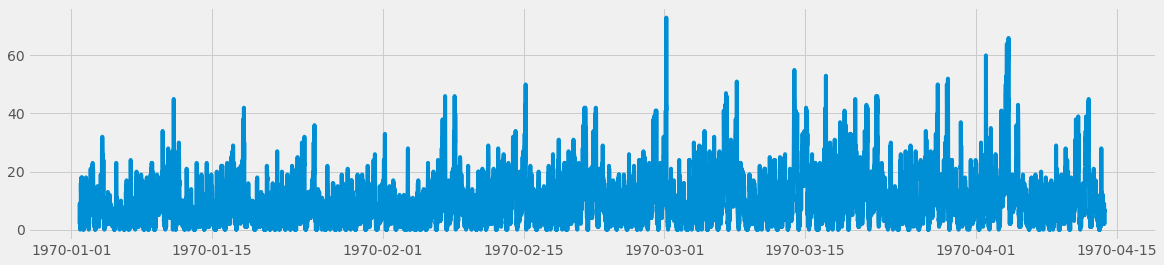

In [207]:
### plotting the entire data
plt.figure(figsize = (18,4))
plt.plot(logins)

We can clearly identify some kind of patterns in the peaks and troughs which seem to occur at a specified interval in every month. We can identify the pattern after observing the granular changes happening in a week

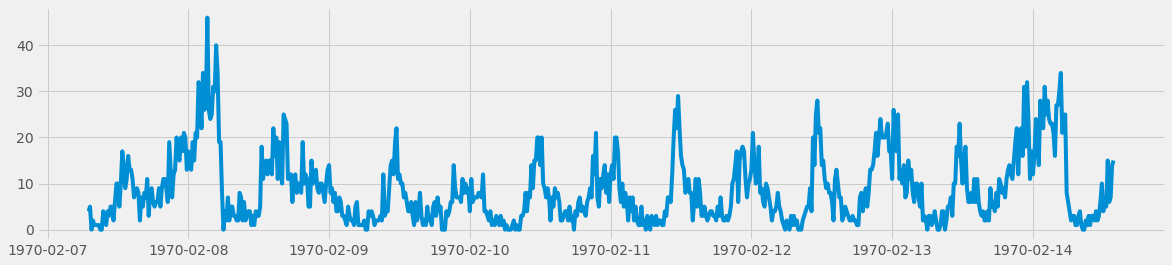

In [208]:
### plotting the data for any given week
plt.figure(figsize = (18,4))
plt.plot(logins[3500:4200])

Observing the usage on a weekly basis tells us that peaks for the most part occur at an interval of every 12 hours.

In [212]:
#logins = logins.reset_index()
logins['count'].max()

73

In [213]:
logins[logins['count'] == 73]['login_time'][5602].dayofweek

6

This tells us that the highest peak occured on a Sunday and from the initial chart we can see that a significant number of peaks occur during the weekends.

### Remarks

After analysing the data we can conclude that peaks usually occur every 12 hours building slowly from morning and peaking in the afternoon. Another insight is that usage gradually increases during the course of a week peaking during a weekend.

## Part 2 : Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the
    observation
    c. how you would interpret the results and provide recommendations to the city
    operations team along with any caveats.

Ans.1. 


Ans.2.

### Part 3 : Predictive Modelling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [49]:
ult_challenge = pd.read_json('ultimate_data_challenge.json')
ult_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [176]:
# checking data info
ult_challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [195]:
### checking if the user is active by checking if the last trip date falls within 30 days after 6 months
for row in ult_challenge.itertuples():
    tmp_signup = pd.Timestamp(row.signup_date)
    tmp_date = tmp_signup + pd.Timedelta('181D')
    tmp_pointer = tmp_date - pd.Timedelta('30D')
    if tmp_pointer <= pd.Timestamp(row.last_trip_date) <= tmp_date:
        ult_challenge.set_value(row.Index, 'active_user', 1)
    else:
        ult_challenge.set_value(row.Index, 'active_user', 0)
   

In [196]:
ult_challenge['active_user'].value_counts()

0    37802
1    12198
Name: active_user, dtype: int64

In [197]:
print("Percent of active users is : {}".format(12198/(12198+37802)*100))

Percent of active users is : 24.396


### Continous data

Plot b/w active_user and avg_dist

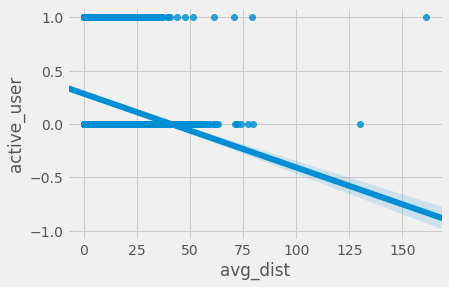

In [214]:
sns.regplot(y = ult_challenge['active_user'], x = ult_challenge['avg_dist'], fit_reg = True)

We can clearly see users are more likely to retain for shorter distances and would be most probably leaving for long distances

Plot b/w active user and avg_rating_by_driver

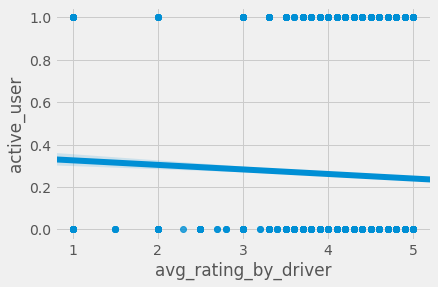

In [215]:
sns.regplot(y = ult_challenge['active_user'], x = ult_challenge['avg_rating_by_driver'], fit_reg = True)

Plot b/w active user and avg_rating_of_driver

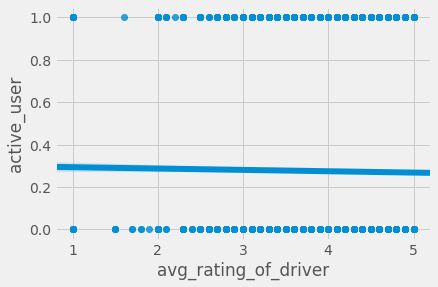

In [216]:
sns.regplot(y = ult_challenge['active_user'], x = ult_challenge['avg_rating_of_driver'], fit_reg = True)

Comparing the two plots above we can see that average_rating_by_driver has a stronger negative co-relation and a user is more likely to leave in case of a negative rating by driver

In [218]:
## getting rid of timestamp columns to make it easy for training model
ult_challenge = ult_challenge.drop(['last_trip_date', 'signup_date'], axis = 1)

In [220]:
## checking for null values
ult_challenge.isnull().sum()

city                         0
trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_user                  0
dtype: int64

In [223]:
### replacing missing ratings by their corresponding means

rating_by_driver_mean = ult_challenge['avg_rating_by_driver'].mean()
by_func = lambda row: rating_by_driver_mean if np.isnan(row) else row
ult_challenge['avg_rating_by_driver'] = ult_challenge['avg_rating_by_driver'].apply(by_func)

rating_of_driver_mean = ult_challenge['avg_rating_of_driver'].mean()
of_func = lambda row: rating_of_driver_mean if np.isnan(row) else row
ult_challenge['avg_rating_of_driver'] = ult_challenge['avg_rating_of_driver'].apply(of_func)


ult_challenge['phone'] = ult_challenge['phone'].fillna('Others')

In [224]:
ult_challenge.isnull().sum()

city                      0
trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active_user               0
dtype: int64

In [227]:
# mapping ultimate_black_user to 0 and 1
ult_challenge['ultimate_black_user'] = ult_challenge['ultimate_black_user'].map({False:0, True:1}).astype("category")

In [231]:
from sklearn.model_selection import train_test_split

## extracting input and output
X = ult_challenge[ult_challenge.columns[:-1]]
y = ult_challenge[ult_challenge.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [232]:
ult_challenge.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#### pipeline for categorical features
categorical_features = ["city", "phone", "ultimate_black_user"]
categorical_transformer = [("encoder", OneHotEncoder())]
categorical_transformer = Pipeline(categorical_transformer)

### pipeline for numeric features
numeric_features = ["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver", "avg_surge", "surge_pct", "trips_in_first_30_days", "weekday_pct"]
numeric_transformer = [("scaler", StandardScaler())]
numeric_transformer = Pipeline(numeric_transformer)

## setting up pipeline
preprocess = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features), ("cat", categorical_transformer, categorical_features)])

## random forest estimator
pipeline = Pipeline(steps = [("pre", preprocess), ("rf", RandomForestClassifier(random_state = 42))])

## some parameters for grid search
params = {"rf__n_estimators": [30,50,75],
          "rf__max_depth": [2, 3, 5]}

## fitting pipeline to grid search
cv = GridSearchCV(pipeline, param_grid = params, cv = 3)
cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pre',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('scaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                 

In [234]:
print("Top parameters are: {}".format(cv.best_params_))
print("Accuracy from the best model is {}".format(cv.best_score_*100))

Top parameters are: {'rf__max_depth': 5, 'rf__n_estimators': 30}
Accuracy from the best model is 79.27714285714286


Checking Model Performance on Test Set

In [236]:
from sklearn import metrics

y_pred = cv.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
test_f1= metrics.f1_score(y_test, y_pred)

print("Accuracy of our model on test data is {}".format(test_acc*100))
print("F1 score of our model on test data is {}".format(test_f1))

Accuracy of our model on test data is 79.12666666666667
F1 score of our model on test data is 0.4139996256784578


In [246]:
pipeline.fit(X_train, y_train)

feat_weights = pipeline.named_steps['rf'].feature_importances_

# numeric columns
num_columns = ult_challenge[numeric_features].columns.values

# categorical columns
cat_columns = pd.get_dummies(ult_challenge[categorical_features]).columns.values

# total columns
tot_col = list(num_columns) + list(cat_columns)

In [252]:
# adding column names to the feature list
weight_dict = dict(zip(tot_col, feat_weights))

sorted_dict  = sorted(weight_dict.items(), key = lambda x: x[1], reverse = True)

In [253]:
sorted_dict

[('avg_dist', 0.2982473948269323),
 ('weekday_pct', 0.14864382428145265),
 ('avg_rating_by_driver', 0.11036117015218243),
 ('avg_rating_of_driver', 0.09362800201384515),
 ('avg_surge', 0.09137689043390444),
 ('trips_in_first_30_days', 0.08830541284806837),
 ('surge_pct', 0.07715951978654374),
 ("city_King's Landing", 0.023138360498976256),
 ('phone_iPhone', 0.013698502843280102),
 ('city_Astapor', 0.013282049852679544),
 ('phone_Android', 0.012306686386165182),
 ('ultimate_black_user_1', 0.011070858832967106),
 ('ultimate_black_user_0', 0.009325076633770827),
 ('city_Winterfell', 0.008282358442063405),
 ('phone_Others', 0.0011738921671686868)]

We can clearly see avg_dist has the highest weight among all features along with weekday_pct being the next most important feature. People from city Kings's Landing and users with an Iphone seem to be more likely to be retained which is a takeaway from this analysis